<a href="https://colab.research.google.com/github/Kaiziferr/deep_learning/blob/master/multilayer_perceptron/08_workshop_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import math
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense

**Config**

In [60]:
sns.set(style="darkgrid")
pd.set_option('display.float_format', '{:,.2f}'.format)
title_data = 'Pasajeros en la aerolinea'
paleta = sns.color_palette("tab10").as_hex()
warnings.filterwarnings("ignore")
random_seedd = 12354

# **Data**
---
Este es un problema en el que, dado un año y un mes, la tareas es predecir el número de pasajeros de aerolineas internecionales en unidades de 1.000. Los datos van desde enero de 1949 hasta diciembre de 1960 o 12 años, con 144 observaciones.


In [61]:
url = 'https://raw.githubusercontent.com/jinfagang/LSTM_learn/master/international-airline-passengers.csv'
data = pd.read_csv(url, usecols=[1], engine='python', dtype='str')
data_values = data.values.astype('float64')

# **Data Split**
---



In [62]:
train_size = int(len(data_values)*0.67)
test_size = len(data_values) - train_size
train, test = data_values[:train_size, :], data_values[train_size:, :]

# **Create Data**
---



In [63]:
len(train) - 1

95

In [64]:
def create_dataset(data, loock_back = 1):
  dataX, dataY = [], []
  for i in range(len(data)-loock_back-1):
    item_x = data[i: (i+loock_back), 0]
    #print(item_x, i, (i+loock_back))
    item_y = data[i+loock_back,0]
    #print(item_y, i, (i+loock_back))
    dataX.append(item_x)
    dataY.append(item_y)
  return np.array(dataX), np.array(dataY)

In [65]:
loock_back = 1
trainX, trainY = create_dataset(train, loock_back)
testX, testY = create_dataset(test, loock_back)

La red LSTM espera que los datos de entrada (X) se proporcionen con una estructura de matriz especifica en forma de [muestras, pasos de tiempo (ventana), caracteristicas]<br><br>
Los datos preparados tienen la forma: [muestras, carcteristicas]<br><br>

# **Diseño de Model**
---
- Capa visible con 1 entrada
- Capa oculta con 8 neuronas
- Capa de salida
- Modelo se ajusta usando el error cuadratico medio


In [66]:
loock_back

1

In [67]:
model = Sequential()
model.add(Dense(8, input_dim = loock_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=0)

In [68]:
trainX.shape[0] / 2

47.0

# **Estimar rendimiento**
---

In [69]:
train_score = model.evaluate(trainX, trainY, verbose=0)
test_score = model.evaluate(testX, testY, verbose=0)

In [70]:
print('Puntuación Entrenamiento %.2f MSE (%.2f RMSE)' % (train_score, math.sqrt(train_score)))
print('Puntuación Validación %.2f MSE (%.2f RMSE)' % (test_score, math.sqrt(test_score)))

Puntuación Entrenamiento 529.87 MSE (23.02 RMSE)
Puntuación Validación 2352.27 MSE (48.50 RMSE)


In [71]:
print(f"El modelo falla en aproximadamente {math.sqrt(train_score)} por mes para los datos de entrenamiento")
print(f"El modelo falla en aproximadamente {math.sqrt(test_score)} para los datos de validación ")

El modelo falla en aproximadamente 23.018860091713382 por mes para los datos de entrenamiento
El modelo falla en aproximadamente 48.50021897099409 para los datos de validación 


# **Predicción**
---



In [72]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

2/2 [==============================] - 0s 5ms/step


# **Resultados**
---



# **Plot**
---



In [73]:
train_predict_plot = np.empty_like(data_values)
train_predict_plot[:,:] = np.nan
train_predict_plot[loock_back: len(train_predict)+loock_back, :] = train_predict

test_predict_plot = np.empty_like(data_values)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predict)+(loock_back*2)+1: len(data_values)-1:] = test_predict

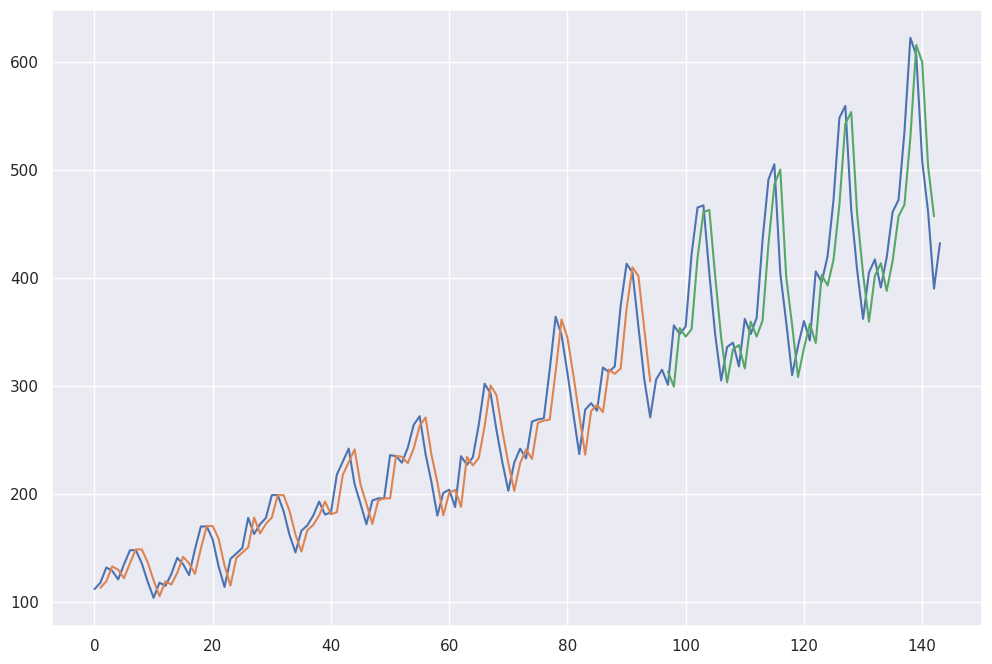

In [74]:
plt.figure(figsize=(12,8))
plt.plot(data_values)
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)

- Se puede apreciar que el modelo ha hecho un trabajo regular pobre a la hora de ajustar. Tanto en el entrenamiento como en la validación.



- Una red Multilayer perceptron es una arquitectura pesima para trabajar con series de tiempo.

# **Diseño de Model Mejoras**
---
- Capa visible con 3 entrada
- Capa oculta con 14 neuronas
- Agrega una segunda capa oculta con 8 neuronas
- Capa de salida
- Modelo se ajusta usando el error cuadratico medio
- Aumenta el número de epocas de 400

# **Create Data**
---

In [75]:
loock_back = 3
trainX, trainY = create_dataset(train, loock_back)
testX, testY = create_dataset(test, loock_back)

In [76]:
model = Sequential()
model.add(Dense(14, input_dim = 3, activation = 'relu', kernel_initializer='glorot_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [77]:
model.fit(trainX, trainY, epochs = 400, batch_size = 2, verbose = 0)

# **Estimar rendimiento**
---

In [79]:
train_score = model.evaluate(trainX, trainY, verbose = 0)
test_score = model.evaluate(testX, testY, verbose = 0)
print('Puntuación Entrenamiento %.2f MSE (%.2f RMSE)' % (train_score, math.sqrt(train_score)))
print('Puntuación Validación %.2f MSE (%.2f RMSE)' % (test_score, math.sqrt(test_score)))

Puntuación Entrenamiento 403.73 MSE (20.09 RMSE)
Puntuación Validación 1533.86 MSE (39.16 RMSE)


In [80]:
print(f"El modelo falla en aprocimadamente {math.sqrt(train_score)} mil pasajeros por mes para los datos de entrenamiento")
print(f"El modelo falla en aprocimadamente {math.sqrt(test_score)} para los datos de validación ")

El modelo falla en aprocimadamente 20.09315539677201 mil pasajeros por mes para los datos de entrenamiento
El modelo falla en aprocimadamente 39.1645308108346 para los datos de validación 


- El modelo con un loock_back mayor (3) tiene un mejor rendimiento que un loock_back (1), ya que el error de entrenamiento y validaciòn es menor, sin embargo, se evidencia un ligero overfitting.

# **Predicción**
---



In [81]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

2/2 [==============================] - 0s 6ms/step


# **Plot**
---

In [82]:
train_predict_plot = np.empty_like(data_values)
train_predict_plot[:,:] = np.nan
train_predict_plot[loock_back: len(train_predict)+loock_back, :] = train_predict

test_predict_plot = np.empty_like(data_values)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predict)+(loock_back*2)+1: len(data_values)-1:] = test_predict

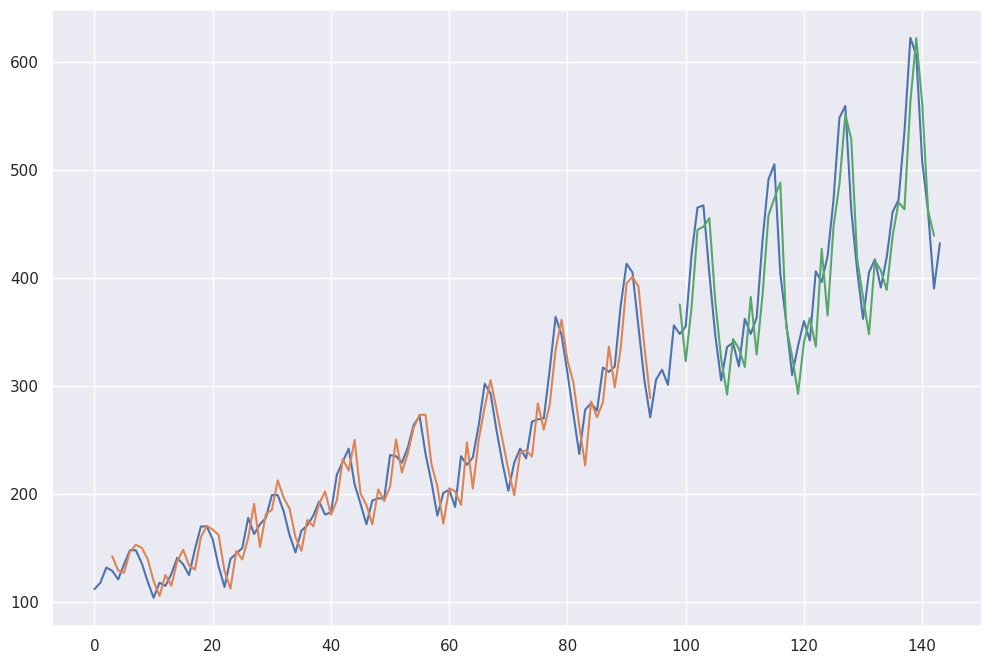

In [83]:
plt.figure(figsize=(12,8))
plt.plot(data_values)
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)

- Aun persiste un mal ajuste con un modelo tradicional., pese algunas mejoras